In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load the dataset
df_sms = pd.read_csv('spam.csv', encoding='latin-1')

In [5]:
df_sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
# df_sms.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)
df_sms = df_sms[['label', 'message']]

In [10]:
df_sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# convert to lowercase

df_sms['message_clean'] = df_sms['message'].copy().str.lower()
df_sms.head()

,label,message,message_clean
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ..."
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro..."


In [12]:
df_sms.iloc[0]['message']

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [13]:
# remove numbers

def remove_numbers(text):
    output = ''.join(char for char in text if not char.isdigit())
    return output

df_sms['message_clean'] = df_sms.loc[:, 'message_clean'].copy().apply(remove_numbers)

In [14]:
df_sms.head()

,label,message,message_clean
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ..."
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro..."


In [17]:
# https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python

import re

# remove contractions

contractions_dict = {     
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I had",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "iit will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

def expand_contractions(s, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, s)

df_sms['message_clean'] = df_sms.loc[:, 'message_clean'].copy().apply(expand_contractions)

In [19]:
# pip install contractions

In [21]:
# import contractions

# df_sms['message_clean'] = df_sms.loc[:, 'message_clean'].copy().apply(contractions.fix)

In [25]:
from string import punctuation

# remove punctuation
def remove_punctuation(text):
    output = ''.join(char for char in text if char not in punctuation)
    return output

df_sms['message_clean'] = df_sms.loc[:, 'message_clean'].copy().apply(remove_punctuation)

In [28]:
df_sms.head()

,label,message,message_clean
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i do not think he goes to usf he lives aro...


In [31]:
# remove white space 

def strip_text(text):
    output = ' '.join(text.split())
    return output

df_sms['message_clean'] = df_sms.loc[:, 'message_clean'].copy().apply(strip_text)

In [33]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
# remove stopwords

def remove_stopwords(text):
    output = ' '.join([word for word in nltk.word_tokenize(text) if word not in eng_stopwords])
    return output

eng_stopwords = stopwords.words('english')
df_sms['message_clean'] = df_sms.loc[:, 'message_clean'].copy().apply(remove_stopwords)

In [37]:
from nltk.stem import WordNetLemmatizer

# lemmatization
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [52]:
from nltk.corpus import wordnet

def get_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {'J': wordnet.ADJ,
               'N': wordnet.NOUN,
               'V': wordnet.VERB,
               'R': wordnet.ADV}
    
    return tag_dict.get(tag, wordnet.NOUN)


def lemmatize_word(text):
    lemmatizer = WordNetLemmatizer()
    output = ' '.join([lemmatizer.lemmatize(word, pos=get_pos(word)) for word in nltk.word_tokenize(text)])
    return output

df_sms['message_clean_lemma'] = df_sms.loc[:, 'message_clean'].copy().apply(lemmatize_word)

In [53]:
df_sms.head()

,label,message,message_clean,message_clean_lemma
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though,nah think go usf life around though


In [54]:
from nltk.stem import SnowballStemmer

# stemming
stemmer = SnowballStemmer('english')

def stem_word(text):
    output = ' '.join([stemmer.stem(word) for word in nltk.word_tokenize(text)])
    return output

df_sms['message_clean_stem'] = df_sms.loc[:, 'message_clean'].copy().apply(stem_word)

In [55]:
df_sms.head()

,label,message,message_clean,message_clean_lemma,message_clean_stem
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,free entry wkly comp win fa cup final tkts st ...,free entri wkli comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,u dun say early hor u c already say,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though,nah think go usf life around though,nah think goe usf live around though


## Text Exploration

<AxesSubplot:>

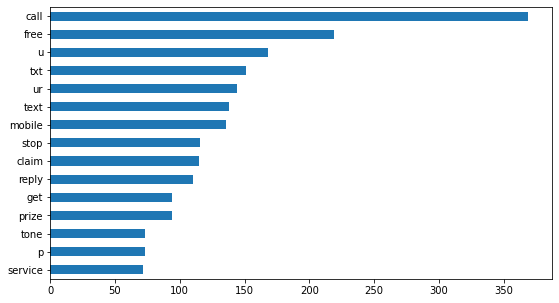

In [62]:
fig, ax = plt.subplots(figsize=(9,5))

df_spam_word_freq = df_sms[
    df_sms['label'] == 'spam'
]['message_clean_lemma'].str.extractall('([a-z]+)').rename(
    columns={0: 'word'}
).reset_index(drop=True)

df_spam_word_freq['word'].value_counts().sort_values(ascending=True)[-15:].plot(kind='barh', ax=ax)

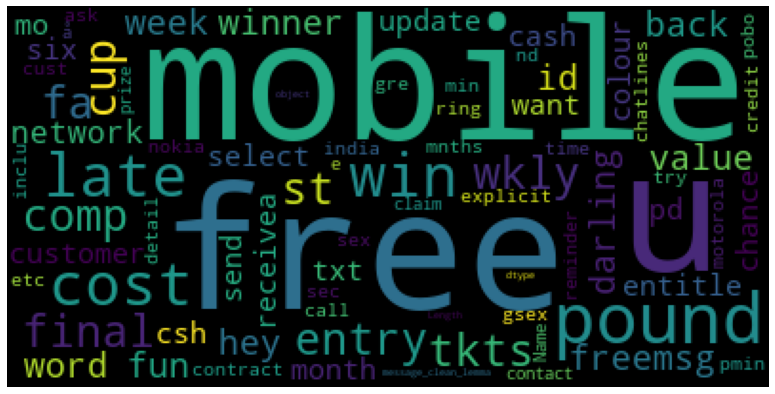

In [65]:
from wordcloud import WordCloud

spam_wordcloud = WordCloud().generate(str(df_sms[df_sms['label'] == 'spam']['message_clean_lemma']))
plt.figure(figsize=(14,7))
plt.imshow(spam_wordcloud)
plt.axis('off');

In [66]:
df_sms['message_length'] = df_sms['message_clean_lemma'].apply(len)

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


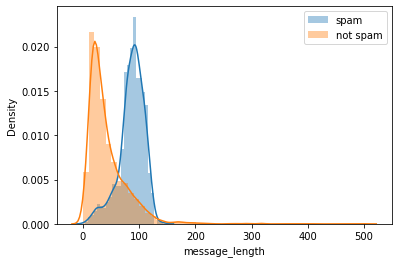

In [67]:
sns.distplot(df_sms[df_sms['label'] == 'spam']['message_length'], label='spam')
sns.distplot(df_sms[df_sms['label'] == 'ham']['message_length'], label='not spam')
plt.legend();

In [68]:
df_sms['label'].value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [69]:
from sklearn.model_selection import train_test_split

X = df_sms['message_clean_lemma']
y = np.where(df_sms['label'] == 'spam', 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=22)

In [86]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# tf 
vectorizer = CountVectorizer()
X_train_tf = vectorizer.fit_transform(X_train).toarray()
X_test_tf = vectorizer.transform(X_test).toarray()

tf_feature_names = vectorizer.get_feature_names()

In [78]:
# tf-idf

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()

In [79]:
X_train_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

log_reg = LogisticRegression()
log_reg.fit(X_train_tf, y_train)

LogisticRegression()

In [89]:
log_reg.score(X_train_tf, y_train)

0.9937177473636976

In [90]:
y_pred_train = log_reg.predict(X_train_tf)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3859
           1       1.00      0.95      0.98       598

    accuracy                           0.99      4457
   macro avg       1.00      0.98      0.99      4457
weighted avg       0.99      0.99      0.99      4457



In [94]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV

stratified_cv = StratifiedKFold(n_splits=5, random_state=22, shuffle=True)

param_grid = {
    'log_reg__C': [1.0, 0.1, 0.01],
    'tfidfvectorizer__ngram_range': [(1,1), (1,2)]
}

model = LogisticRegression()
tfidf_vectorizer = TfidfVectorizer()
pipeline = Pipeline([
    ('tfidfvectorizer', tfidf_vectorizer),
    ('log_reg', model)
])

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=stratified_cv
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=22, shuffle=True),
             estimator=Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                                       ('log_reg', LogisticRegression())]),
             param_grid={'log_reg__C': [1.0, 0.1, 0.01],
                         'tfidfvectorizer__ngram_range': [(1, 1), (1, 2)]})

In [95]:
grid_search.best_estimator_.fit(X_train, y_train)
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       0.97      0.76      0.85       149

    accuracy                           0.96      1115
   macro avg       0.96      0.88      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [100]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()

word_cols = list(map(lambda x: 'word_' + x, tfidf_vectorizer.get_feature_names()))
df_tfidf = pd.DataFrame(X_train_tfidf, columns=word_cols)
df_sms_with_tfidf = pd.concat([df_sms, df_tfidf], axis=1)

In [102]:
df_sms_with_tfidf.head()

,label,message,message_clean,message_clean_lemma,message_clean_stem,message_length,word_aa,word_aah,word_aathilove,word_aathiwhere,...,word_ìï,word_ìïll,word_ûthanks,word_ûªm,word_ûªt,word_ûªve,word_ûï,word_ûïharry,word_ûò,word_ûówell
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...,82,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joke wif u oni,23,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,free entry wkly comp win fa cup final tkts st ...,free entri wkli comp win fa cup final tkts st ...,106,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,u dun say early hor u c already say,u dun say earli hor u c alreadi say,35,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though,nah think go usf life around though,nah think goe usf live around though,35,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Using Udemy Courses dataset
1. Apply text preprocessing to the title column
2. Create document-term matrix (TF and TF-IDF matrix)
3. Train a model based on the document-term matrix
4. (Bonus) Include any other features from the original dataset